<a href="https://colab.research.google.com/github/ad-kmt/time-series-forecasting/blob/main/prophet_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet Tutorial - Time Series Forecasting with Prophet

## Installation

Before we start, make sure you have Prophet installed in your environment. In Colab, you can install it with the following command:


In [2]:
!pip install prophet

## Step 1: Import Necessary Libraries

In [4]:
import pandas as pd
from prophet import Prophet

## Step 2: Load Data

Let's load the time series data of log daily page views for the Wikipedia page of Peyton Manning.

Link: https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


Let's see how our data looks like

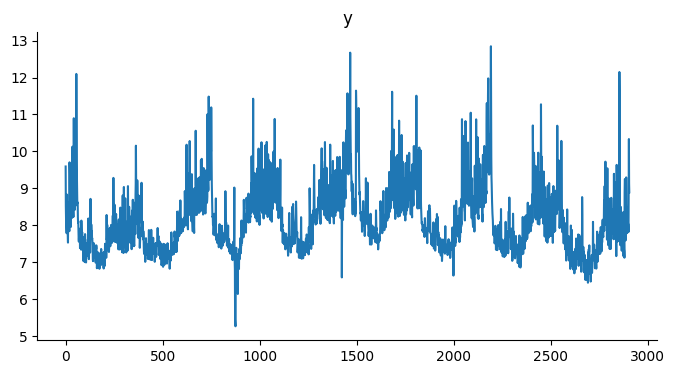

In [6]:
from matplotlib import pyplot as plt
df['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

## Step 3: Fit the Model
We instantiate a new Prophet object and fit the model to the historical data.


In [7]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphfwsi5q0/p7uerylu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphfwsi5q0/pcbefot7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68735', 'data', 'file=/tmp/tmphfwsi5q0/p7uerylu.json', 'init=/tmp/tmphfwsi5q0/pcbefot7.json', 'output', 'file=/tmp/tmphfwsi5q0/prophet_modelpnner2yu/prophet_model-20240824154618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:46:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Step 4: Make Future Predictions
We'll create a dataframe with future dates for which we want predictions. We'll extend the forecast 365 days into the future.


In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


## Step 5: Make Predictions
Using the `predict` method, we'll generate forecasts for both the historical and future dates. The output will include the forecast (`yhat`) and uncertainty intervals (`yhat_lower` and `yhat_upper`).


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.424051,8.897639
3266,2017-01-16,8.535122,7.871133,9.227711
3267,2017-01-17,8.322549,7.629664,9.035188
3268,2017-01-18,8.155179,7.381365,8.841768
3269,2017-01-19,8.167136,7.383015,8.821889


## Step 6: Plot the Forecast
We can visualize the forecast by using Prophet's built-in `plot` method.


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


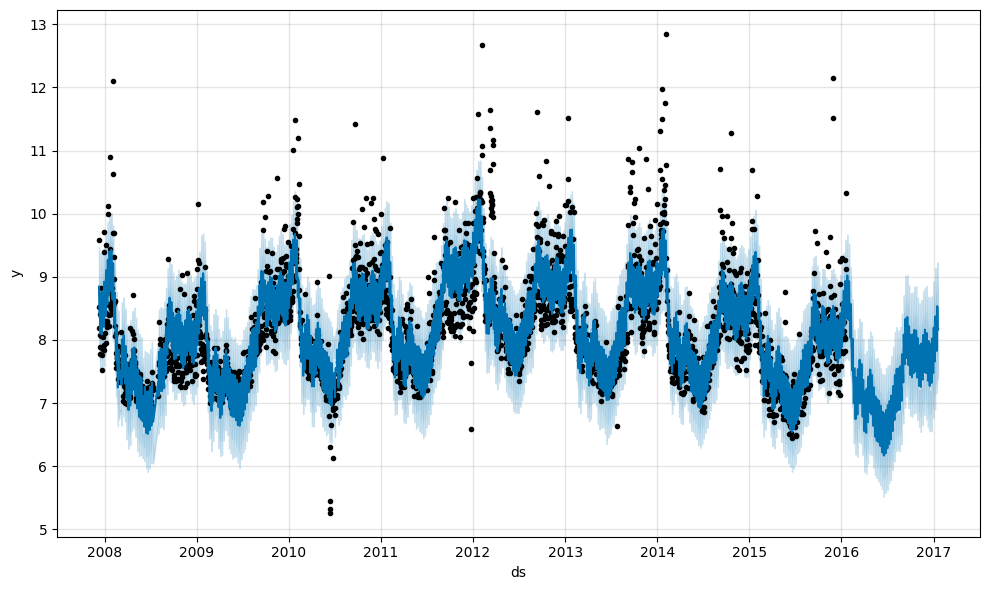

In [13]:
fig1 = m.plot(forecast)

## Step 7: Plot Forecast Components
To gain more insights into the forecast, we can plot its components: trend, yearly seasonality, weekly seasonality, and (if included) holidays.


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

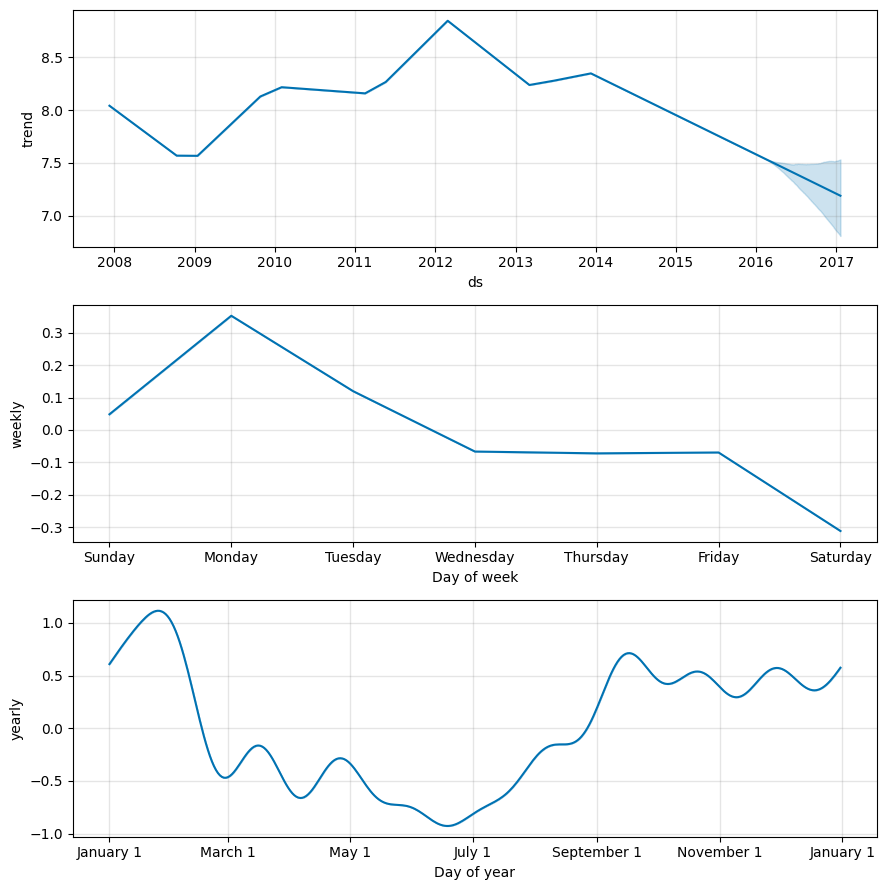

In [14]:
fig2 = m.plot_components(forecast)

# Extras: Interactive Plotting with Plotly

## Step 1: Import library
For interactive visualizations, we can use `plotly`. Ensure that plotly and its dependencies are installed in the environment.


In [15]:
!pip install plotly
from prophet.plot import plot_plotly, plot_components_plotly

## Step 2: Interactive Forecast Plot
Create an interactive plot of the forecast using Plotly.



In [16]:
plot_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## Step 3: Interactive Components Plot
We can also generate interactive plots of the forecast components using Plotly.

In [17]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Conclusion
This notebook provides an introduction to using the Prophet library for time series forecasting. The library automatically handles seasonality, trends, and special events, making it ideal for business forecasting problems.

You can explore additional features and customizations by consulting the Prophet documentation or using `help(Prophet)` for more information about the available methods.